In [ ]:
from sklearn import 

In [1]:
CHALLENGE = "antiviral-potency-2025"  # or: "antiviral-potency-2025"


In [2]:
import polaris as po

competition = po.load_competition(f"asap-discovery/{CHALLENGE}")

[2025-02-04 15:58:22] INFO     The version of Polaris that was used to create the artifact (0.11.0) ]8;id=488474;file:///home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=354227;file:///home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               is different from the currently installed version of Polaris                        
                               (0.11.6).                                                                           

                      WARNING  You're loading data from a remote location. If the dataset is small     ]8;id=217559;file:///home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/polaris/dataset/_base.py\_base.py]8;;\:]8;id=567482;file:///home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/polaris/dataset/_base.py#182\182]8;;\
                               enough, consider caching the dataset first using                                    
                               CompetitionSpecification.cache() for more performant data access.                   

In [3]:
competition.cache()


Output()

[15:58:23] Copying to destination                                                                      ]8;id=271012;file:///home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/polaris/dataset/_base.py\_base.py]8;;\:]8;id=481942;file:///home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/polaris/dataset/_base.py#381\381]8;;\
           /home/hmacdope/.cache/polaris/datasets/75e133b6-13ae-4cf3-8eaf-a8ddba2bdbd9/data.zarr                   

           For large Zarr archives, this may take a while.                                             ]8;id=631491;file:///home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/polaris/dataset/_base.py\_base.py]8;;\:]8;id=857344;file:///home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/polaris/dataset/_base.py#382\382]8;;\

[15:58:24]  Success: Copying Zarr keys                                                                ]8;id=717249;file:///home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=838623;file:///home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

            Success: Copying Zarr archive                                                             ]8;id=796599;file:///home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=37128;file:///home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

'/home/hmacdope/.cache/polaris/datasets/75e133b6-13ae-4cf3-8eaf-a8ddba2bdbd9'

In [4]:
train, test = competition.get_train_test_split()


In [5]:
train.target_cols


['pIC50 (MERS-CoV Mpro)', 'pIC50 (SARS-CoV-2 Mpro)']

In [6]:
import datamol as dm
import pandas as pd
import seaborn as sns

In [16]:
train[1]

({'CXSMILES': 'C=C(CN1CCC2=C(C=C(Cl)C=C2)C1C(=O)NC1=CN=CC2=CC=CC=C12)C(N)=O',
  'pIC50 (MERS-CoV Mpro)': 4.92,
  'pIC50 (SARS-CoV-2 Mpro)': 5.29},
 {'pIC50 (MERS-CoV Mpro)': 4.92, 'pIC50 (SARS-CoV-2 Mpro)': 5.29})

In [8]:
tdf = train.as_dataframe()

In [9]:
tdf

,CXSMILES,pIC50 (MERS-CoV Mpro),pIC50 (SARS-CoV-2 Mpro)
0,COC[C@]1(C)C(=O)N(C2=CN=CC3=CC=CC=C23)C(=O)N1C...,4.19,NaN
1,C=C(CN1CCC2=C(C=C(Cl)C=C2)C1C(=O)NC1=CN=CC2=CC...,4.92,5.29
2,CNC(=O)CN1C[C@]2(C[C@H](C)N(C3=CN=CC=C3C3CC3)C...,4.73,NaN
3,C=C(CN1CCC2=C(C=C(Cl)C=C2)C1C(=O)NC1=CN=CC2=CC...,4.90,6.11
4,C=C(CN1CCC2=C(C=C(Cl)C=C2)C1C(=O)NC1=CN=CC2=CC...,4.81,5.62
...,...,...,...
1026,CNS(=O)(=O)OCC(=O)N1CCN(CC2=CC=CC(Cl)=C2)[C@H]...,5.57,6.38
1027,O=C(CC1=CN=CC2=CC=CC=C12)N1CC[C@@H]2CCCC[C@H]2...,4.60,6.09
1028,CNC(=O)[C@H]1CCCN(C(=O)CC2=CN=CC3=CC=CC=C23)C1...,4.22,NaN
1029,C[C@H]1CCCN(C(=O)CC2=CN=CC3=CC=CC=C23)[C@H]1C ...,4.40,5.06


In [10]:
tdf["LOGP"] = tdf["CXSMILES"].apply(lambda x: dm.descriptors.clogp(dm.to_mol(x)))

In [11]:
tdf["TPSA"] = tdf["CXSMILES"].apply(lambda x: dm.descriptors.tpsa(dm.to_mol(x)))

In [12]:
tdf["MW"] = tdf["CXSMILES"].apply(lambda x: dm.descriptors.mw(dm.to_mol(x)))

# pIC50 (MERS-CoV Mpro)

<Axes: xlabel='pIC50 (MERS-CoV Mpro)', ylabel='LOGP'>

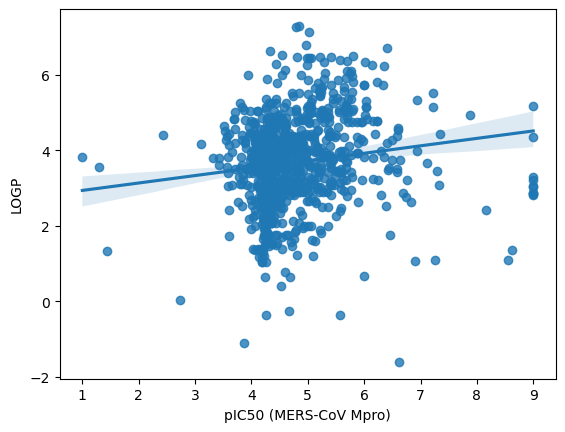

In [13]:
sns.regplot(data=tdf, x="pIC50 (MERS-CoV Mpro)", y="LOGP")

<Axes: xlabel='pIC50 (MERS-CoV Mpro)', ylabel='TPSA'>

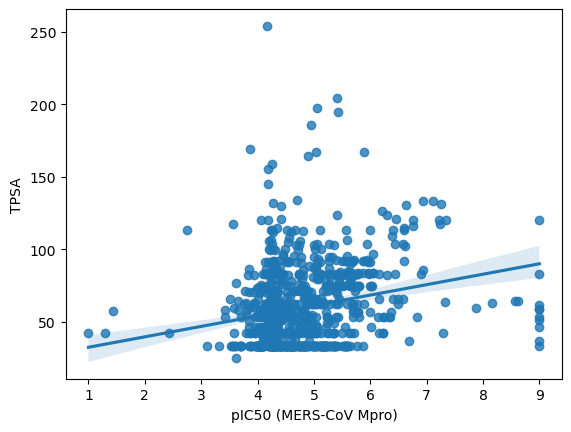

In [14]:
sns.regplot(data=tdf, x="pIC50 (MERS-CoV Mpro)", y="TPSA")

<Axes: xlabel='pIC50 (MERS-CoV Mpro)', ylabel='MW'>

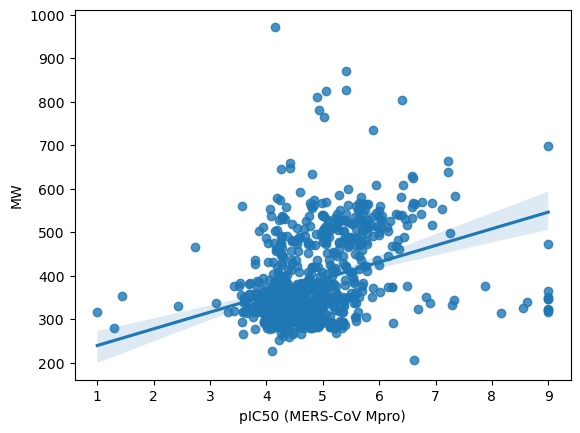

In [15]:
sns.regplot(data=tdf, x="pIC50 (MERS-CoV Mpro)", y="MW")

# pIC50 (SARS-CoV Mpro)

<Axes: xlabel='pIC50 (SARS-CoV-2 Mpro)', ylabel='LOGP'>

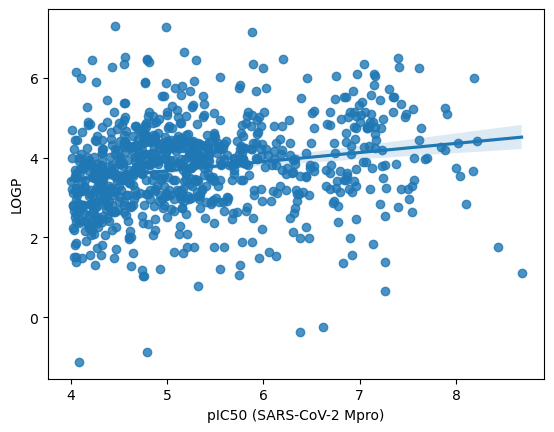

In [17]:
sns.regplot(data=tdf, x="pIC50 (SARS-CoV-2 Mpro)", y="LOGP")

<Axes: xlabel='pIC50 (SARS-CoV-2 Mpro)', ylabel='TPSA'>

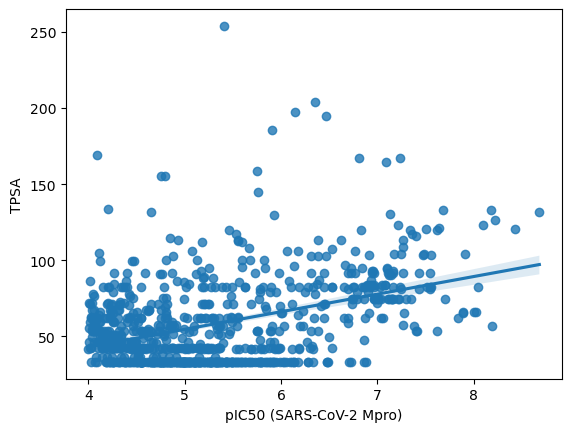

In [18]:
sns.regplot(data=tdf, x="pIC50 (SARS-CoV-2 Mpro)", y="TPSA")

<Axes: xlabel='pIC50 (SARS-CoV-2 Mpro)', ylabel='MW'>

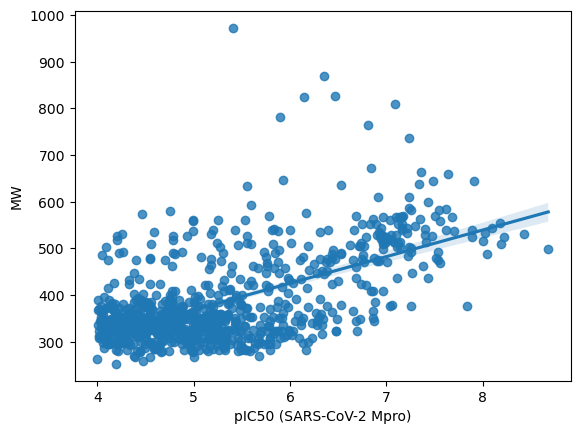

In [19]:
sns.regplot(data=tdf, x="pIC50 (SARS-CoV-2 Mpro)", y="MW")

In [20]:
from sklearn import linear_model
import numpy as np

# Prepare the input data. We'll use Datamol to compute the ECFP fingerprints for both the train and test columns.
X_train = np.array([dm.descriptors.mw(dm.to_mol(smi)) for smi in train.X["CXSMILES"]]).reshape(-1, 1)
X_test = np.array([dm.descriptors.mw(dm.to_mol(smi)) for smi in test.X]).reshape(-1, 1)

y_pred = {}

# For each of the targets...
for tgt in competition.target_cols:

    # We get the training targets
    # Note that we need to mask out NaNs since the multi-task matrix is sparse.
    y_true = train.y[tgt]
    mask = ~np.isnan(y_true)

    # We'll train a simple baseline model
    model = linear_model.LinearRegression()
    model.fit(X_train[mask], y_true[mask])

    # And then use that to predict the targets for the test set
    y_pred[tgt] = model.predict(X_test)

In [21]:
y_pred

{'pIC50 (MERS-CoV Mpro)': array([5.00343648, 4.97429604, 5.36122719, 4.91581587, 5.02620958,
        5.15633531, 5.28637927, 5.28637927, 4.89940076, 4.89620212,
        4.79529636, 5.07176884, 5.10442177, 5.16290194, 5.15633531,
        5.01985531, 5.19214163, 5.0588625 , 4.57131627, 5.22776983,
        5.10745912, 5.11097384, 5.00355252, 5.16288738, 5.01985531,
        5.02952649, 5.07176884, 4.98076859, 4.97761296, 5.13356221,
        5.32215131, 5.3351737 , 5.24729032, 5.00355252, 5.00355252,
        5.00355252, 5.32862163, 5.32862163, 5.37403706, 5.27656426,
        5.09455278, 5.00678768, 5.05546606, 5.05546606, 5.05870122,
        5.05870122, 5.06193637, 5.06193637, 5.06193637, 5.06193637,
        5.09467106, 5.24082001, 4.92885505, 5.00678768, 5.04911179,
        5.00675116, 5.08811899, 5.39030768, 5.32847779, 5.24729032,
        4.87019164, 5.04911179, 5.0555821 , 5.05231043, 5.39030768,
        5.34474841, 5.41316253, 5.46529942, 5.43901533, 5.04255972,
        5.05231043, 5.1

In [22]:
preds = pd.DataFrame(y_pred)

In [23]:
preds["split"] = "test"

In [24]:
tdf["split"] = "train"

In [25]:
combined = pd.concat([tdf, preds])

<Axes: xlabel='pIC50 (SARS-CoV-2 Mpro)', ylabel='Count'>

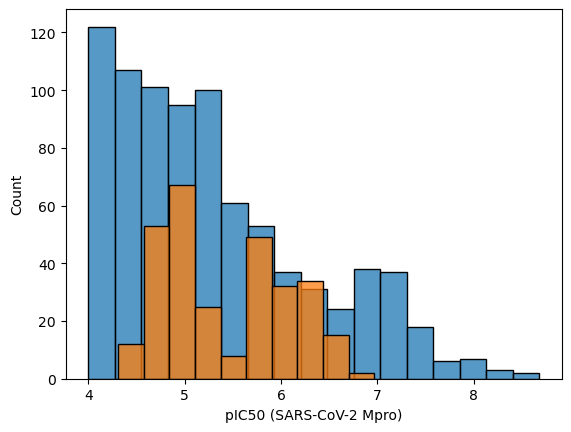

In [27]:
sns.histplot(data=tdf, x="pIC50 (SARS-CoV-2 Mpro)")
sns.histplot(data=preds, x="pIC50 (SARS-CoV-2 Mpro)")

<Axes: xlabel='pIC50 (MERS-CoV Mpro)', ylabel='Count'>

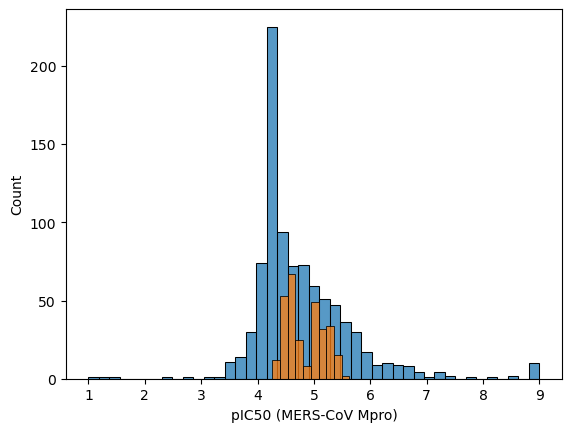

In [28]:
sns.histplot(data=tdf, x="pIC50 (MERS-CoV Mpro)")
sns.histplot(data=preds, x="pIC50 (MERS-CoV Mpro)")

In [129]:
competition.submit_predictions(
    predictions=y_pred,
    prediction_name="asap-potency-mw-linear-baseline",
    prediction_owner="hmacdope",
    report_url="https://asapdiscovery.org", 
    # The below metadata is optional, but recommended.
    github_url="https://asapdiscovery.org",
    description="ASAPDiscovery MW linear baseline",
    tags=["baseline"],
    user_attributes={"Framework": "Scikit-learn", "Method": "LinearRegression", }
)

[15:36:02]  Success: Submitting competition predictions                                               ]8;id=835754;file:///home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=920911;file:///home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

In [130]:
competition.submit_predictions?

Signature:
competition.submit_predictions(
    predictions: list | numpy.ndarray | dict[str, list | numpy.ndarray | dict[str, list | numpy.ndarray]],
    prediction_name: typing.Annotated[str, StringConstraints(strip_whitespace=None, to_upper=None, to_lower=None, strict=None, min_length=4, max_length=64, pattern='^[A-Za-z0-9_-]+$')],
    prediction_owner: str,
    report_url: typing.Annotated[str, BeforeValidator(func=<function <lambda> at 0x7f0d02bcaac0>, json_schema_input_type=PydanticUndefined)],
    contributors: list[typing.Annotated[str, StringConstraints(strip_whitespace=None, to_upper=None, to_lower=None, strict=None, min_length=4, max_length=64, pattern='^[A-Za-z0-9_-]+$')]] | None = None,
    github_url: Optional[Annotated[str, BeforeValidator(func=<function <lambda> at 0x7f0d02bcaac0>, json_schema_input_type=PydanticUndefined)]] = None,
    description: str = '',
    tags: list[str] | None = None,
    user_attributes: dict[str, str] | None = None,
) -> None
Docstring:
Conven